#Name: **SIMRAN ANAND**
#Registration number: **19BCD7243**
## Deep Learning CSE4006
##Submitted to: Dr. BKSP Kumar raju Alluri

##**Lab 5: Transfer Learning**
###As pretrained models like VGGNet,ResNet,etc take extensive time for training, follow a long process and require many epochs, we retrain the last layers of pretrained model which means we apply transfer learning to our model. Convolution and MaxPooling sequence are a part of standard architecture, whereas retrained last few layers(3 here) which are dense fully connected layers are a part of Transfer Learning models.

# Question 1: Perform Transfer Learning with Resnet

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator

In [ ]:

train_datagen = ImageDataGenerator(
    rescale = 1
)
test_datagen = ImageDataGenerator(
    rescale = 1
)

In [ ]:

model = keras.Sequential()

In [ ]:

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

In [ ]:

training_iterator = train_datagen.flow_from_directory('/content/drive/MyDrive/flowers/train', batch_size=64, target_size=(100,100))
testing_iterator = test_datagen.flow_from_directory('/content/drive/MyDrive/flowers/test', batch_size=64, target_size=(100,100))


Found 3140 images belonging to 5 classes.
Found 1228 images belonging to 5 classes.


In [ ]:
#Compile and fit the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
history = model.fit(training_iterator, validation_data = testing_iterator, epochs=1)

50/50 [==============================] - 886s 18s/step - loss: 26.5532 - accuracy: 0.2631 - val_loss: 1.6106 - val_accuracy: 0.2109


In [ ]:
#save the model
model.save('models/flower_baseline_model.h5')

In [ ]:
#get the class labels from iterator
class_labels = training_iterator.class_indices
print(class_labels)

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}


In [ ]:
# {'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

##To improve model accuracy, we apply 4 processes: Dropout, Padding, Augmentation and Hyperparameter Tuning

# 1-Dropout
### The process of removing certain edges and connections in the network in order to improve model accuracy and reduce complexity and overfitting. It refers to ignoring units (i.e. neurons) during the training phase of certain set of neurons which is chosen at random.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
    rescale = 1 #rescale=1 implies that we use the training and test dataset as it is; no new images are added
)
test_datagen = ImageDataGenerator( #ImageDataGenerator is used to read images from folders as well as generate new images
    rescale = 1
)


model = keras.Sequential() #We make and build our own sequential DNN here


model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.2))
          
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.2))
          
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(5, activation='softmax'))


training_iterator = train_datagen.flow_from_directory('/content/drive/MyDrive/flowers/train', batch_size=64, target_size=(100,100))
testing_iterator = test_datagen.flow_from_directory('/content/drive/MyDrive/flowers/test', batch_size=64, target_size=(100,100))



model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
history = model.fit(training_iterator, validation_data = testing_iterator, epochs=8)


Found 3140 images belonging to 5 classes.
Found 1228 images belonging to 5 classes.
Epoch 1/8
50/50 [==============================] - 75s 1s/step - loss: 42.4114 - accuracy: 0.2226 - val_loss: 1.6080 - val_accuracy: 0.2077
Epoch 2/8
50/50 [==============================] - 74s 2s/step - loss: 1.5823 - accuracy: 0.2678 - val_loss: 1.6109 - val_accuracy: 0.2052
Epoch 3/8
50/50 [==============================] - 75s 1s/step - loss: 1.5694 - accuracy: 0.2713 - val_loss: 1.6253 - val_accuracy: 0.2052
Epoch 4/8
50/50 [==============================] - 74s 1s/step - loss: 1.5481 - accuracy: 0.2920 - val_loss: 1.6321 - val_accuracy: 0.2117
Epoch 5/8
50/50 [==============================] - 75s 1s/step - loss: 1.5375 - accuracy: 0.2898 - val_loss: 1.6415 - val_accuracy: 0.2223
Epoch 6/8
50/50 [==============================] - 74s 2s/step - loss: 1.5241 - accuracy: 0.2898 - val_loss: 1.6175 - val_accuracy: 0.2158
Epoch 7/8
50/50 [==============================] - 74s 1s/step - loss: 1.5010 - a

# 2: Padding
###It is done to make input image size equal to the output image size

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
    rescale = 1
)
test_datagen = ImageDataGenerator(
    rescale = 1
)

model = keras.Sequential()




model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3), padding='same'))
model.add(layers.MaxPooling2D((2,2)))


model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2,2)))
          
model.add(layers.Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2,2)))
          
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(5, activation='softmax'))



training_iterator = train_datagen.flow_from_directory('/content/drive/MyDrive/flowers/train', batch_size=64, target_size=(100,100))
testing_iterator = test_datagen.flow_from_directory('/content/drive/MyDrive/flowers/test', batch_size=64, target_size=(100,100))



model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
history = model.fit(training_iterator, validation_data = testing_iterator, epochs=8)



Found 3140 images belonging to 5 classes.
Found 1228 images belonging to 5 classes.
Epoch 1/8
50/50 [==============================] - 83s 2s/step - loss: 45.5667 - accuracy: 0.2615 - val_loss: 1.4794 - val_accuracy: 0.3363
Epoch 2/8
50/50 [==============================] - 82s 2s/step - loss: 1.4686 - accuracy: 0.3936 - val_loss: 1.5891 - val_accuracy: 0.2647
Epoch 3/8
50/50 [==============================] - 82s 2s/step - loss: 1.4640 - accuracy: 0.3777 - val_loss: 1.5850 - val_accuracy: 0.3143
Epoch 4/8
50/50 [==============================] - 82s 2s/step - loss: 1.3546 - accuracy: 0.4373 - val_loss: 1.5602 - val_accuracy: 0.3347
Epoch 5/8
50/50 [==============================] - 82s 2s/step - loss: 1.1895 - accuracy: 0.5150 - val_loss: 1.7170 - val_accuracy: 0.3135
Epoch 6/8
50/50 [==============================] - 82s 2s/step - loss: 1.0569 - accuracy: 0.5768 - val_loss: 1.8022 - val_accuracy: 0.3893
Epoch 7/8
50/50 [==============================] - 82s 2s/step - loss: 0.8866 - a

# 3: Tuning
### One of the integral preprocessing techniques to improve accuracy is Hyperparameter tuning, which involves changing the parameters of the model, like weights, values, neurons and connections or edges.
###Transfer Learning is solution of Hyperparameter Tuning to enhance accuracy.


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
!pip install keras_tuner
import keras_tuner as kt


train_datagen = ImageDataGenerator(
    rescale = 1
)
test_datagen = ImageDataGenerator(
    rescale = 1
)

     |████████████████████████████████| 97 kB 3.3 MB/s 


In [ ]:
def build_model(hp): 
    model = keras.Sequential()
    
    model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)))
    model.add(layers.MaxPooling2D((2,2)))

    model.add(layers.Conv2D(64, (3,3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))

    model.add(layers.Conv2D(128, (3,3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))

    model.add(layers.Flatten())

    
    model.add(layers.Dense(units=hp.Choice("layer size",[128,256,512]), activation='relu'))
    
    model.add(layers.Dense(5, activation='softmax'))
    
 
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    
    return model

In [ ]:
#RandomSearch function applied on keras tuner model 

tuner = kt.RandomSearch(build_model, objective="val_accuracy", overwrite=True, max_trials=3, directory="models/param_tuning_demo", project_name="param_tuning_demo")

In [ ]:

tuner.search_space_summary()
tuner.search(training_iterator,validation_data = testing_iterator, epochs=8)
best_model = tuner.get_best_models()[0]

Trial 3 Complete [00h 09m 21s]
val_accuracy: 0.4967426657676697

Best val_accuracy So Far: 0.4967426657676697
Total elapsed time: 00h 29m 48s
INFO:tensorflow:Oracle triggered exit


In [ ]:

best_model.save('/content/drive/MyDrive/models/hyper_tuned_model.h5')

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/flowers/hyper_tuned_model.h5')

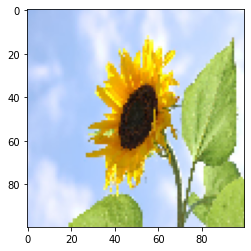

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt


img = load_img('/content/drive/MyDrive/flowers/train/sunflower/1240625276_fb3bd0c7b1.jpg', target_size=(100,100))
plt.imshow(img)
plt.show()

In [ ]:

img = img_to_array(img)
img = img.reshape(1,100,100,3)


In [ ]:

result = model.predict(img)

In [ ]:

class_labels = {'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [ ]:

print(result) 

[[2.4558220e-03 1.8918620e-02 2.4897565e-07 9.7861302e-01 1.2384087e-05]]


In [ ]:

result = np.argmax(result)
print(result)

3


In [ ]:

print([key for key in class_labels][result])


sunflower


###The flower accurately predicted as output by the model is sunflower.

# 4: AUGMENTATION
###Done to understand holistic view of all possible combinations of images; It also reduces overfiting. Thus, it is done on the training dataset only, but not for test dataset (as it contains labels).

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator

In [ ]:

train_datagen = ImageDataGenerator(
    rescale = 1/255,
    horizontal_flip = True,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2
)
test_datagen = ImageDataGenerator(
    rescale = 1/255,
    horizontal_flip = True,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2
)

In [ ]:

model = keras.Sequential()

In [ ]:

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
          
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
          
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(5, activation='softmax'))

In [ ]:

training_iterator = train_datagen.flow_from_directory('/content/drive/MyDrive/flowers/train', batch_size=64, target_size=(100,100))
testing_iterator = test_datagen.flow_from_directory('/content/drive/MyDrive/flowers/test', batch_size=64, target_size=(100,100))


Found 3140 images belonging to 5 classes.
Found 1228 images belonging to 5 classes.


In [ ]:

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
history = model.fit(training_iterator, validation_data = testing_iterator, epochs=8)

Epoch 1/8
50/50 [==============================] - 83s 2s/step - loss: 1.3954 - accuracy: 0.3885 - val_loss: 1.1812 - val_accuracy: 0.5114
Epoch 2/8
50/50 [==============================] - 82s 2s/step - loss: 1.1716 - accuracy: 0.5268 - val_loss: 1.0433 - val_accuracy: 0.5953
Epoch 3/8
50/50 [==============================] - 82s 2s/step - loss: 1.0718 - accuracy: 0.5854 - val_loss: 1.0203 - val_accuracy: 0.5822
Epoch 4/8
50/50 [==============================] - 81s 2s/step - loss: 1.0105 - accuracy: 0.5889 - val_loss: 0.9590 - val_accuracy: 0.6173
Epoch 5/8
50/50 [==============================] - 81s 2s/step - loss: 0.9595 - accuracy: 0.6248 - val_loss: 0.9595 - val_accuracy: 0.6197
Epoch 6/8
50/50 [==============================] - 81s 2s/step - loss: 0.9218 - accuracy: 0.6449 - val_loss: 0.9126 - val_accuracy: 0.6221
Epoch 7/8
50/50 [==============================] - 82s 2s/step - loss: 0.8786 - accuracy: 0.6551 - val_loss: 0.8910 - val_accuracy: 0.6409
Epoch 8/8
50/50 [==========

# Transfer Learning with ResNet model: 


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator

In [ ]:

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model

In [ ]:

train_datagen = ImageDataGenerator(
    rescale = 1/255,
    horizontal_flip = True,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2
)
test_datagen = ImageDataGenerator(
    rescale = 1/255
)

# We ensure that the input shape that we mention is the same as ResNet input image size
(ResNet model architecture has around 151 layers, 
here let us take the input shape or image size to be 224*224 and we make our own 3 Fully Connected Layers)

So, input_shape=(224,224,3)

target_size=(224,224)


In [ ]:
 #include_top=False so as to tell the system not to include Fully Connected Layers and to include all bottom layers' weights
#Initializing ResNet50
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3))
#We make our own 3 Fully Connected Layers for ResNet model to achieve optimal training time


In [ ]:

#Adding layers to the ResNet50
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Activation, Dense,Dropout

model=Sequential()
#Add the Dense layers along with activation and batch normalization
model.add(base_model)
model.add(Flatten())
#Add the Dense layers along with activation and batch normalization
model.add(Dense(1024,activation=('relu'),input_dim=512))
model.add(Dense(512,activation=('relu'))) 
model.add(Dropout(.4))
model.add(Dense(256,activation=('relu'))) 
model.add(Dropout(.3))
model.add(Dense(128,activation=('relu')))
model.add(Dropout(.2))
model.add(Dense(5,activation=('softmax')))

#Summary of ResNet50 Model
model.summary()



Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten_2 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              102761472 
_________________________________________________________________
dense_5 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)              

In [ ]:

for layer in model.layers:
    layer.trainable = False

In [ ]:
#After building the fully connected layers, we connect them
flatten_layer = layers.Flatten()(model.output)


flattened_fc_layer = layers.Dense(512, activation='relu')(flatten_layer)


flattened_fc_softmax_layer = layers.Dense(5, activation='softmax')(flattened_fc_layer)
#We retrain the initialized weights in Transfer Learning

In [ ]:

model = Model(inputs=model.inputs, outputs=flattened_fc_softmax_layer)

In [ ]:

training_iterator = train_datagen.flow_from_directory('/content/drive/MyDrive/flowers/train', batch_size=64, target_size=(224,224))
testing_iterator = test_datagen.flow_from_directory('/content/drive/MyDrive/flowers/test', batch_size=64, target_size=(224,224))


Found 3140 images belonging to 5 classes.
Found 1228 images belonging to 5 classes.


In [ ]:

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
history = model.fit(training_iterator, validation_data = testing_iterator, epochs=4)

Epoch 1/4
50/50 [==============================] - 708s 14s/step - loss: 1.5937 - accuracy: 0.2551 - val_loss: 1.6441 - val_accuracy: 0.1971
Epoch 2/4
50/50 [==============================] - 701s 14s/step - loss: 1.5907 - accuracy: 0.2615 - val_loss: 1.6285 - val_accuracy: 0.1971
Epoch 3/4
50/50 [==============================] - 701s 14s/step - loss: 1.5897 - accuracy: 0.2621 - val_loss: 1.6323 - val_accuracy: 0.1971
Epoch 4/4
50/50 [==============================] - 699s 14s/step - loss: 1.5923 - accuracy: 0.2605 - val_loss: 1.6249 - val_accuracy: 0.1971


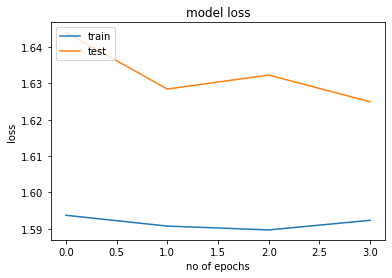

In [ ]:
import matplotlib.pyplot as plt


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('no of epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

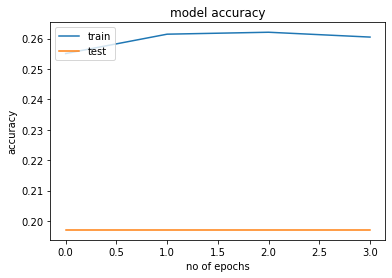

In [ ]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('no of epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:

model.save('/content/drive/MyDrive/flowers/transfer_resnet50_flower.h5')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


# predict 

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np

In [ ]:

model = load_model('/content/drive/MyDrive/flowers/transfer_resnet50_flower.h5')

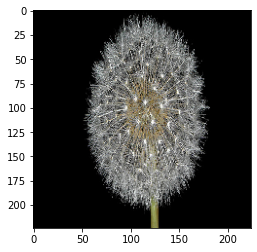

In [ ]:
img = load_img('/content/drive/MyDrive/flowers/train/dandelion/1074999133_1e4a1e042e.jpg', target_size=(224,224))
plt.imshow(img)
plt.show() #/content/drive/MyDrive/flowers/train/sunflower/1240625276_fb3bd0c7b1.jpg

In [ ]:

img = img_to_array(img)
img = img.reshape(1,224,224,3)

In [ ]:
result = model.predict(img)

In [ ]:

class_labels = {'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [ ]:

print(result)


[[0.17007332 0.26852345 0.16883007 0.1558172  0.23675594]]


In [ ]:

result = np.argmax(result)
print(result)

1


In [ ]:

print([key for key in class_labels][result])

dandelion


###The flower accurately predicted as output by the model is dandelion.

# Question 2: Do Training for Non-Dense layers while using Transfer learning

###This basically implies retraining some of the convolutional layers (non dense layers) and freezing the dense (Fully connected layers). This is the process of Fine Tuning models, done to improve accuracy in Transfer Learning.

In [ ]:
# load the VGG16 network, ensuring the head FC layer sets are left
# off
# set the batch size when fine-tuning
BATCH_SIZE = 32
baseModel = ResNet50(include_top=False,weights="imagenet",input_shape=(224, 224, 3))
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(512, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(5, activation="softmax")(headModel)
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)

In [ ]:
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
	layer.trainable = False

##Training the non dense layers, i.e, some of the Convolutional layers of the network. We go back to previous layers and retrain the model here.

In [ ]:
# now that the head FC layers have been trained/initialized, lets
# unfreeze the final set of CONV layers and make them trainable
for layer in baseModel.layers[15:]:
	layer.trainable = True
# loop over the layers in the model and show which ones are trainable
# or not
for layer in baseModel.layers:
	print("{}: {}".format(layer, layer.trainable))

<keras.engine.input_layer.InputLayer object at 0x7fb5d5be94d0>: False
<keras.layers.convolutional.ZeroPadding2D object at 0x7fb5d3bbbb10>: False
<keras.layers.convolutional.Conv2D object at 0x7fb5d2011cd0>: False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fb5d515d1d0>: False
<keras.layers.core.Activation object at 0x7fb5bbe86950>: False
<keras.layers.convolutional.ZeroPadding2D object at 0x7fb5d222ae50>: False
<keras.layers.pooling.MaxPooling2D object at 0x7fb5cde18ad0>: False
<keras.layers.convolutional.Conv2D object at 0x7fb5cde18490>: False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fb5d4b417d0>: False
<keras.layers.core.Activation object at 0x7fb5d59e2cd0>: False
<keras.layers.convolutional.Conv2D object at 0x7fb5bbe14410>: False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fb5d3bad090>: False
<keras.layers.core.Activation object at 0x7fb5d59e2650>: False
<keras.layers.convo

In [ ]:
# compile our model (this needs to be done after our setting our
# layers to being non-trainable
model.compile(loss="categorical_crossentropy", optimizer='adam',metrics=["accuracy"])
history = model.fit(training_iterator, validation_data = testing_iterator, epochs=4)

Epoch 1/4
50/50 [==============================] - 722s 14s/step - loss: 5.4254 - accuracy: 0.2057 - val_loss: 1.5994 - val_accuracy: 0.2052
Epoch 2/4
50/50 [==============================] - 711s 14s/step - loss: 1.6038 - accuracy: 0.2580 - val_loss: 1.5928 - val_accuracy: 0.1995
Epoch 3/4
50/50 [==============================] - 705s 14s/step - loss: 1.6039 - accuracy: 0.2841 - val_loss: 1.5828 - val_accuracy: 0.3013
Epoch 4/4
50/50 [==============================] - 707s 14s/step - loss: 1.6004 - accuracy: 0.2809 - val_loss: 1.5750 - val_accuracy: 0.2964


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
model.save('/content/drive/MyDrive/flowers/nondense_resnet50_flower.h5')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
model = load_model('/content/drive/MyDrive/flowers/nondense_resnet50_flower.h5')

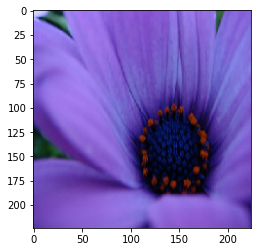

In [ ]:
img = load_img('/content/drive/MyDrive/flowers/train/daisy/1286274236_1d7ac84efb_n.jpg', target_size=(224,224))
plt.imshow(img)
plt.show()

In [ ]:

img = img_to_array(img)
img = img.reshape(1,224,224,3)

In [ ]:
result = model.predict(img)

In [ ]:
class_labels = {'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [ ]:
print(result)

[[0.47369644 0.01766915 0.1760924  0.07497174 0.25757018]]


In [ ]:
result = np.argmax(result)
print(result)

0


In [ ]:
print([key for key in class_labels][result])

daisy


######The flower accurately predicted as output by the model is daisy.

# Question 3: Change the flowers dataset by doing edge detection and then apply all the non-transfer learning and transfer models

###Canny edge detection is a image processing method used to detect edges in an image while suppressing noise.

In [ ]:
import cv2
import numpy as np
import glob

def auto_canny(image, sigma=0.33):
    # Compute the median of the single channel pixel intensities
    v = np.median(image)

    # Apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    return cv2.Canny(image, lower, upper)

# Read in each image and convert to grayscale
images = [cv2.imread(file,0) for file in glob.glob("/content/drive/MyDrive/flowers/train/*.jpg")]

# Iterate through each image, perform edge detection, and save image
number = 0
for image in images:
    canny = auto_canny(image)
    cv2.imwrite('canny_{}.png'.format(number), canny)
    number += 1

In [ ]:
base_model.save('/content/drive/MyDrive/models/images.h5')
import tensorflow as tf
import keras
model = keras.models.load_model('/content/drive/MyDrive/models/images.h5')
#img = tf.keras.applications.resnet50.preprocess_input(images)
images.append(images)
#base_model.save(images)
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/models/images.h5')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


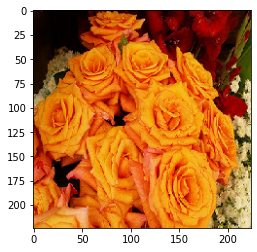

In [ ]:
img = load_img('/content/drive/MyDrive/flowers/train/rose/123128873_546b8b7355_n.jpg', target_size=(224,224))
plt.imshow(img)
plt.show()

In [ ]:

img = img_to_array(img)
canny = img.reshape(1,224,224,3)
result = model.predict(canny)
class_labels = {'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

###The flower predicted as output by the model is rose.

# Question 4: Look at the Weights Repository- TensorFlowHub and Implement new models on 102 Oxford Flowers Dataset

Link: https://www.robots.ox.ac.uk/~vgg/data/flowers/102/



Number of flower types 102
Number of training examples: 6149
Number of validation examples: 1020
Number of test examples: 1020

Flower types full list:
['pink primrose', 'hard-leaved pocket orchid', 'canterbury bells', 'sweet pea', 'english marigold', 'tiger lily', 'moon orchid', 'bird of paradise', 'monkshood', 'globe thistle', 'snapdragon', "colt's foot", 'king protea', 'spear thistle', 'yellow iris', 'globe-flower', 'purple coneflower', 'peruvian lily', 'balloon flower', 'giant white arum lily', 'fire lily', 'pincushion flower', 'fritillary', 'red ginger', 'grape hyacinth', 'corn poppy', 'prince of wales feathers', 'stemless gentian', 'artichoke', 'sweet william', 'carnation', 'garden phlox', 'love in the mist', 'mexican aster', 'alpine sea holly', 'ruby-lipped cattleya', 'cape flower', 'great masterwort', 'siam tulip', 'lenten rose', 'barbeton daisy', 'daffodil', 'sword lily', 'poinsettia', 'bolero deep blue', 'wallflower', 'marigold', 'buttercup', 'oxeye daisy', 'common dandelion'

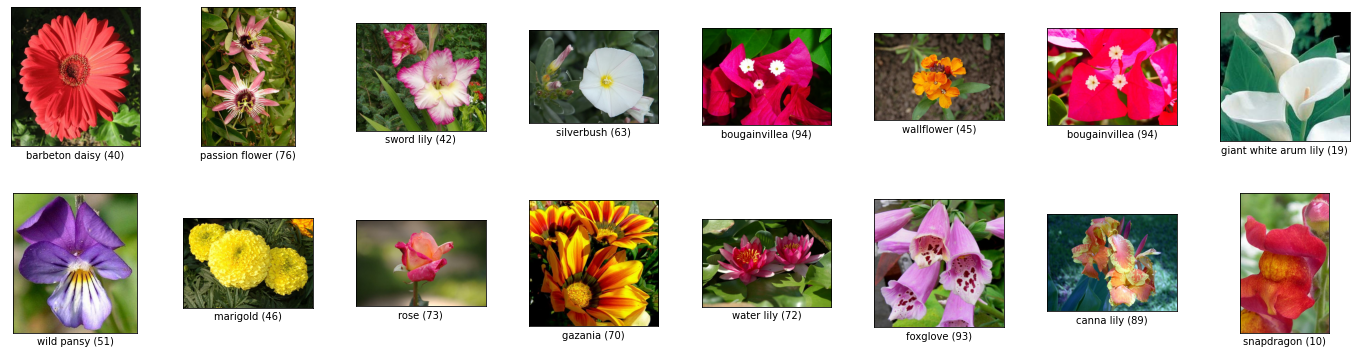

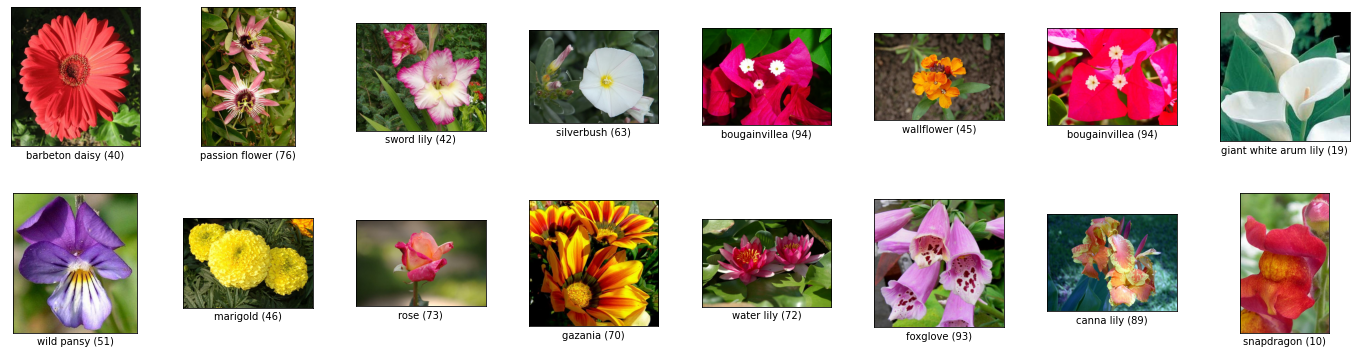

In [ ]:
ds_name = 'oxford_flowers102'
splits = ['test', 'validation', 'train']
ds, info = tfds.load(ds_name, split = splits, with_info=True)
(train_examples, validation_examples, test_examples) = ds
print(f"Number of flower types {info.features['label'].num_classes}")
print(f"Number of training examples: {tf.data.experimental.cardinality(train_examples)}")
print(f"Number of validation examples: {tf.data.experimental.cardinality(validation_examples)}")
print(f"Number of test examples: {tf.data.experimental.cardinality(test_examples)}\n")

print('Flower types full list:')
print(info.features['label'].names)

tfds.show_examples(train_examples, info, rows=2, cols=8)

##Let's train new model inception_v3 on the 102 Oxford Flowers Dataset, from TensorFlow Hub

In [ ]:
import argparse
import numpy as np
import os
import logging
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds


EPOCHS = 1
BATCH_SIZE = 32
LEARNING_RATE = 0.2
DROPOUT_RATE = 0.3
EARLY_STOPPING_TRAIN_ACCURACY = 0.995
TF_AUTOTUNE = tf.data.experimental.AUTOTUNE
TF_HUB_MODEL_URL = 'https://tfhub.dev/google/inaturalist/inception_v3/feature_vector/4'
TF_DATASET_NAME = 'oxford_flowers102'
IMAGE_SIZE = (299, 299)
SHUFFLE_BUFFER_SIZE = 473
MODEL_VERSION = '1'


class EarlyStoppingCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > EARLY_STOPPING_TRAIN_ACCURACY):
            print(
                f"\nEarly stopping at {logs.get('accuracy'):.4f} > {EARLY_STOPPING_TRAIN_ACCURACY}!\n")
            self.model.stop_training = True


def parse_args():
    parser = argparse.ArgumentParser()

    # hyperparameters sent by the client are passed as command-line arguments to the script
    parser.add_argument('--epochs', type=int, default=EPOCHS)
    parser.add_argument('--batch_size', type=int, default=BATCH_SIZE)
    parser.add_argument('--learning_rate', type=float, default=LEARNING_RATE)

    # model_dir is always passed in from SageMaker. By default this is a S3 path under the default bucket.
    parser.add_argument('--model_dir', type=str)
    parser.add_argument('--sm_model_dir', type=str,
                        default=os.environ.get('SM_MODEL_DIR'))
    parser.add_argument('--model_version', type=str, default=MODEL_VERSION)

    return parser.parse_known_args()


def set_gpu_memory_growth():
    gpus = tf.config.list_physical_devices('GPU')

    if gpus:
        print("\nGPU Available.")
        print(f"Number of GPU: {len(gpus)}")
        try:
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
                print(f"Enabled Memory Growth on {gpu.name}\n")
                print()
        except RuntimeError as e:
            print(e)

    print()


def get_datasets(dataset_name):
    tfds.disable_progress_bar()

    splits = ['test', 'validation', 'train']
    splits, ds_info = tfds.load(dataset_name, split=splits, with_info=True)
    (ds_train, ds_validation, ds_test) = splits

    return (ds_train, ds_validation, ds_test), ds_info


def parse_image(features):
    image = features['image']
    image = tf.image.resize(image, IMAGE_SIZE) / 255.0
    return image, features['label']


def training_pipeline(train_raw, batch_size):
    train_preprocessed = train_raw.shuffle(SHUFFLE_BUFFER_SIZE).map(
        parse_image, num_parallel_calls=TF_AUTOTUNE).cache().batch(batch_size).prefetch(TF_AUTOTUNE)

    return train_preprocessed


def test_pipeline(test_raw, batch_size):
    test_preprocessed = test_raw.map(parse_image, num_parallel_calls=TF_AUTOTUNE).cache(
    ).batch(batch_size).prefetch(TF_AUTOTUNE)

    return test_preprocessed


def create_model(train_batches, val_batches, learning_rate):
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    base_model = hub.KerasLayer(TF_HUB_MODEL_URL,
                                input_shape=IMAGE_SIZE + (3,), trainable=False)

    early_stop_callback = EarlyStoppingCallback()

    model = tf.keras.Sequential([
        base_model,
        tf.keras.layers.Dropout(DROPOUT_RATE),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])

    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    model.summary()

    model.fit(train_batches, epochs=args.epochs,
              validation_data=val_batches,
              callbacks=[early_stop_callback])

    return model


if __name__ == "__main__":
    args, _ = parse_args()
    batch_size = args.batch_size
    epochs = args.epochs
    learning_rate = args.learning_rate
    print(
        f"\nBatch Size = {batch_size}, Epochs = {epochs}, Learning Rate = {learning_rate}\n")

    set_gpu_memory_growth()

    (ds_train, ds_validation, ds_test), ds_info = get_datasets(TF_DATASET_NAME)
    NUM_CLASSES = ds_info.features['label'].num_classes

    print(
        f"\nNumber of Training dataset samples: {tf.data.experimental.cardinality(ds_train)}")
    print(
        f"Number of Validation dataset samples: {tf.data.experimental.cardinality(ds_validation)}")
    print(
        f"Number of Test dataset samples: {tf.data.experimental.cardinality(ds_test)}")
    print(f"Number of Flower Categories: {NUM_CLASSES}\n")

    train_batches = training_pipeline(ds_train, batch_size)
    validation_batches = test_pipeline(ds_validation, batch_size)
    test_batches = test_pipeline(ds_test, batch_size)

    model = create_model(train_batches, validation_batches, learning_rate)
    eval_results = model.evaluate(test_batches)

    for metric, value in zip(model.metrics_names, eval_results):
        print(metric + ': {:.4f}'.format(value))



Batch Size = 32, Epochs = 1, Learning Rate = 0.2



Number of Training dataset samples: 6149
Number of Validation dataset samples: 1020
Number of Test dataset samples: 1020
Number of Flower Categories: 102

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   (None, 2048)              21802784  
_________________________________________________________________
dropout_2 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 102)               208998    
Total params: 22,011,782
Trainable params: 208,998
Non-trainable params: 21,802,784
_________________________________________________________________
  8/193 [>.............................] - ETA: 19:55 - loss: 108.4517 - accuracy: 0.1289

##The accuracy obtained by implementing my inception_v3 model on 102 Oxford Flower dataset is 86%

#**Thank you!**
#**Name: Simran Anand**
#**Registration number: 19BCD7243**